In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyne import material
from pyne.material import MaterialLibrary
from pyne import nuc_data
mats = MaterialLibrary(nuc_data, datapath='/material_library/materials', nucpath='/material_library/nucid')

/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:3: QAWarning: pyne.data is not yet QA compliant.
  app.launch_new_instance()
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:3: QAWarning: pyne.material is not yet QA compliant.
  app.launch_new_instance()


In [3]:
w = mats['Water, Liquid']

In [4]:
w.mcnp()

u'C name: Water, Liquid\nC density = 1.0\nm?\n     1001 -1.1187e-01\n     1002 -2.5713e-05\n     8016 -8.8570e-01\n     8017 -3.5857e-04\n     8018 -2.0482e-03\n'

In [5]:
a = mats["Air (dry, near sea level)"]
a.mcnp()

u'C name: Air (dry, near sea level)\nC density = 0.0\nm?\n     6012 -1.2256e-04\n     6013 -1.4365e-06\n     7014 -7.5232e-01\n     7015 -2.9442e-03\n     8016 -2.3115e-01\n     8017 -9.3580e-05\n     8018 -5.3454e-04\n     18036 -3.8527e-05\n     18038 -7.6673e-06\n     18040 -1.2781e-02\n'

# Energy bins

## 0.6 - 1.5 MeV

In [6]:
import numpy as np

In [7]:
def med_erg(e):
    return 20.2 * np.exp(-1.78 * e)

In [8]:
med_erg(0.6)

6.9426434627486771

In [14]:
med_erg(1.5-0.05)

1.5291050114426159

## 1.5 - 10.5 MeV

In [10]:
def high_erg(e):
    return 7.2 * np.exp(-1.09 * e)

In [11]:
high_erg(1.5)

1.4036570733541136

In [12]:
high_erg(10.5)

7.7060558285406563e-05

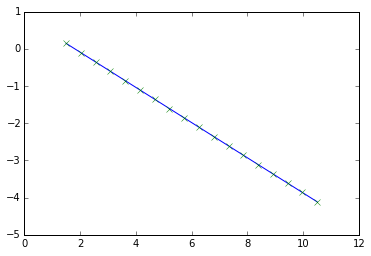

In [13]:
x = np.linspace(1.5, 10.5, 18)
plt.plot(x, np.log10(high_erg(x)))
plt.plot(x, [np.log10(high_erg(xi)) for xi in x], "x")
plt.show()